**Author of the project is Nimesh Apte**

 **Heart Attack Prediction**

In [ ]:
#importing the required libraries
import pandas as pd #imorting pandas for gettig the dataset and working with dataset.
import numpy as np #importing numpy for working with the array type of data or columns that are coverted into array.
import matplotlib.pyplot as plt #imorting matplotlib for visualizing the result  
%matplotlib inline # use to show the output in same file 
import seaborn as sns #importing seaborn for visualizing the result 
sns.set() # load default seaborn theme 

In [ ]:
from sklearn.preprocessing import StandardScaler #importing the Standardard Scaler class from reprocessing libraries  
from sklearn.model_selection import train_test_split #importing the libraries for spliting the dataset into train and test data
from sklearn.metrics import classification_report, confusion_matrix #importing the metrics class for creating the cofuson matrics asnnd gerating the classification report 

In [ ]:
df = pd.read_csv('heart.csv') # reading the dataset 
df.head() # accessing the top 5 rows of the dataset 

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info() # getting the information about the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isnull() # checking the null values present in the dataset   

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum() #checking the no. of null values present in the coloumns 

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
df_copy = df.copy(deep= True)#copying the dataset into df_copy variable 
df_copy[['trtbps','chol','thalachh','oldpeak']] = df_copy[['trtbps', 'chol','thalachh','oldpeak']].replace(0,np.nan)# making changes into df_copy by 
#replacing 0 with np.nan
print(df_copy.isnull().sum())#finding wether the the df_copy dataset contains the null values or not  

age          0
sex          0
cp           0
trtbps       0
chol         0
fbs          0
restecg      0
thalachh     0
exng         0
oldpeak     99
slp          0
caa          0
thall        0
output       0
dtype: int64


In [ ]:
df_copy['oldpeak'].fillna(df_copy['oldpeak'].mean(), inplace= True)#filling the mean value in oldpeak coloumn where the value is nan 

1    165
0    138
Name: output, dtype: int64


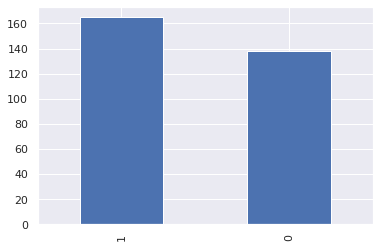

In [ ]:
color_wheel = {1: "red", 2 :'blue'}
colors = df["output"].map(lambda x: color_wheel.get(x+1))
print(df.output.value_counts())
p = df.output.value_counts().plot(kind="bar")

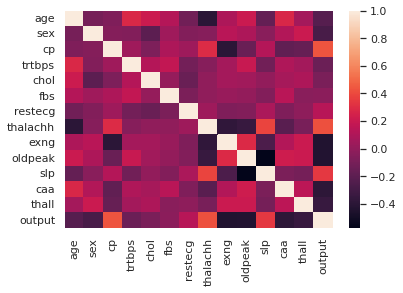

In [ ]:
#using heat map to show correlation between each column
sns.heatmap(df.corr())

# ML model bulding


In [ ]:
x = df.drop('output',axis = 1) #droping the output coloumn 
y = df['output'] #storing the output coloumn in y 

In [ ]:
y # display contains in y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [ ]:
x # display contains in x 

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
#spliting of dataset using train_test_split funtion 

from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=0)

In [ ]:
x_train #display the contains of x_trian variable 

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2


In [ ]:
x_test #display the contains of x_test variable 

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,44,0,2,118,242,0,1,149,0,0.3,1,1,2
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2


In [ ]:
y_train #display the contains of y_trian variable 

74     1
153    1
64     1
296    0
287    0
      ..
251    0
192    0
117    1
47     1
172    0
Name: output, Length: 242, dtype: int64

In [ ]:
y_test #display the contains of y_test variable 

225    0
152    1
228    0
201    0
52     1
      ..
146    1
302    0
26     1
108    1
89     1
Name: output, Length: 61, dtype: int64

# Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier  # importing the DecisionTreeClassifier to apply decision tree algorithm on train dataset 
dtree =  DecisionTreeClassifier() # Assiging the dtree variable to DecisionTreeClassifier 
dtree.fit(x_train, y_train) # fitting the training data 

DecisionTreeClassifier()

In [ ]:
y_pred = dtree.predict(x_test) # predicting the x_test 

In [ ]:
print("Classification report \n", classification_report(y_test, y_pred)) # genrating the classification report of y_test and y_pred elements 

Classification report 
               precision    recall  f1-score   support

           0       0.73      0.81      0.77        27
           1       0.84      0.76      0.80        34

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [ ]:
cm = confusion_matrix(y_test, y_pred) # creating confusion matrix for decision tree algorithm to find accuracy of algorithm 

Text(0.5, 1.0, 'Accuracy Score: 0.7868852459016393')

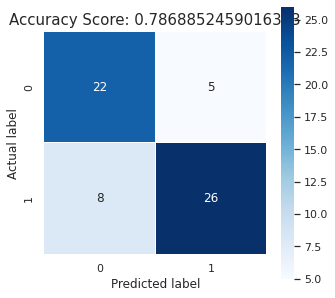

In [ ]:
plt.figure(figsize=(5,5)) #setting the figure size 
sns.heatmap(data=cm, linewidths = .5, annot=True, square=True, cmap = 'Blues')  #creating the heatmap for confusion matrix of decision tree 
plt.ylabel("Actual label") #labeling the y axis 
plt.xlabel('Predicted label') #labeling the x axis 
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(x_test,y_test)) # printing the accurancy of decision tree algorithm 
plt.title(all_sample_title, size=15) #Giving the title to the figure 

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score #importing roc_curve, roc_auc_score libraries to obtain the ruc curve and accuracy score 
y_pred_proba = dtree.predict_proba(x_test)[:][:,1] #calculating the probabilities or y_pred values 

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1) #concatinating actual values and probabilities
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba']) #generating the ROC graphs along with false positive rate, true positive rate and threshold 
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])#calculating the accuracy score using rocc_auc score 

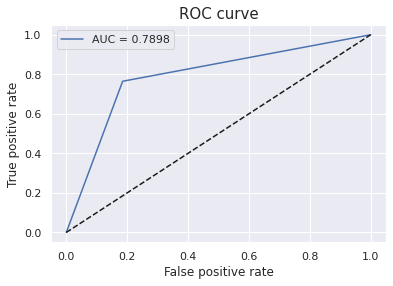

In [ ]:
plt.plot(fpr,tpr,label = 'AUC = %0.4f' %auc)#ploting auc curve 
plt.plot(fpr,fpr, linestyle='--', color = 'k' )#ploting false positive rate    
plt.xlabel('False positive rate')#labeling the x axis
plt.ylabel('True positive rate')#labeling the y axis
plt.title('ROC curve', size=15)#assigignt he title to the graph
plt.legend()

As the auc score > 0.5 so we can conclude that the decision tree classifier had better classified the classes 

# Support vector machine 

In [ ]:
from sklearn import svm  # importing the SVM algorithm function from sklearn library 
svm = svm.SVC(kernel= 'linear', gamma= 'auto', probability=True) 
svm.fit(x_train, y_train)  #fitting the svm model to train dataset 

SVC(gamma='auto', kernel='linear', probability=True)

In [ ]:
y_pred = svm.predict(x_test)  # storing the prediction in y_pred
print("Classification report :\n", classification_report(y_test,y_pred)) # printing the classification report of SVM predicted values 

Classification report :
               precision    recall  f1-score   support

           0       0.83      0.74      0.78        27
           1       0.81      0.88      0.85        34

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



Text(0.5, 1.0, 'Accuracy Score: 0.819672131147541')

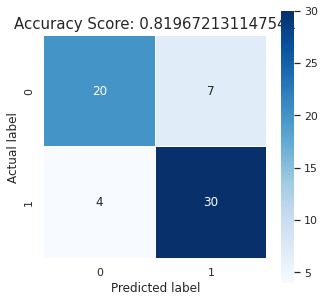

In [ ]:
cm = confusion_matrix(y_test,y_pred) #ceating confusion matrix for SVM algorithm 
plt.figure(figsize=(5,5)) 
sns.heatmap(data= cm, linewidth=.5, annot=True, square = True, cmap = 'Blues')  #diplaying the confusion matrix for SVM algorithm 
plt.ylabel('Actual label') #Assigning the y axis label 
plt.xlabel('Predicted label') # Assiging the x axis label 
all_sample_title = 'Accuracy Score: {0}'.format(svm.score(x_test, y_test)) # finding the accurancy for SVM algorithm 
plt.title(all_sample_title, size = 15) # Giving the title to the figure 

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score#importing roc_curve, roc_auc_score libraries to obtain the ruc curve and accuracy score 
y_pred_proba = svm.predict_proba(x_test)[:][:,1]#calculating the probabilities or y_pred values 

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)#concatinating actual values and probabilities
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])#generating the ROC graphs along with false positive rate, true positive rate and threshold
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])#calculating the accuracy score using rocc_auc score

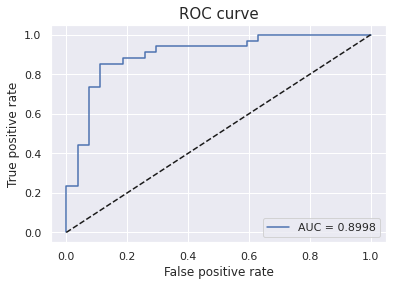

In [ ]:
plt.plot(fpr,tpr,label = 'AUC = %0.4f' %auc)#ploting auc curve 
plt.plot(fpr,fpr, linestyle='--', color = 'k' )#ploting false positive rate    
plt.xlabel('False positive rate')#labeling the x axis
plt.ylabel('True positive rate')#labeling the y axis
plt.title('ROC curve', size=15)#assiging the title to the graph
plt.legend()

As the auc score > 0.5 so we can conclude that the SVM classifier had better classified the classes and also if we copare it with decision tree SVM gives better classification. 

# **Logistic Regression **

In [ ]:
from sklearn.linear_model import LogisticRegression # importing ogistic regression from sklearn library 
logreg = LogisticRegression() # Assigning the logreg classifier to LogisticRegression
logreg.fit(x_train, y_train) # fitting the trianing data 

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = logreg.predict(x_test) # Storing the predicted data from test to y_pred 
print("Classiication report :\n", classification_report(y_test,y_pred))  # creating the classification report for Logistics Regression 

Classiication report :
               precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



Text(0.5, 1.0, 'Accuracy Score : 0.8524590163934426')

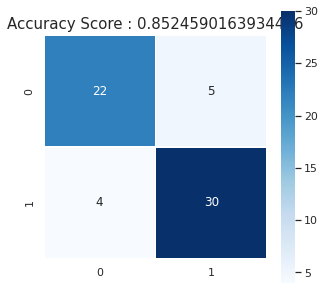

In [ ]:
cm = confusion_matrix(y_test, y_pred) # creating the confusion matrix  for Logistic regresssion
plt.figure(figsize=(5,5))#fixing the figure size 
sns.heatmap(data = cm, linewidth = .5, annot = True, square= True, cmap = 'Blues') # displaying the confusion matrix using heat map 
all_sample_title = 'Accuracy Score : {0}'.format(logreg.score(x_test,y_test)) # printing the accuracy for the Logistic model using test data 
plt.title(all_sample_title, size=15) #assignign the title to the figure 

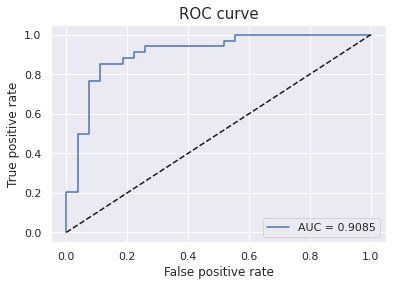

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score #importing roc_curve, roc_auc_score libraries to obtain the ruc curve and accuracy score
y_pred_proba = logreg.predict_proba(x_test)[:][:,1]#calculating the probabilities or y_pred values 

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)#concatinating actual values and probabilities
df_actual_predicted.index = y_test.index #storinng the index for predicted values 

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])#generating the ROC graphs along with false positive rate, true positive rate and threshold
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])#calculating the accuracy score using rocc_auc score

plt.plot(fpr,tpr,label = 'AUC = %0.4f' %auc)#ploting auc curve 
plt.plot(fpr,fpr, linestyle='--', color = 'k' )#ploting false positive rate  
plt.xlabel('False positive rate')#labeling the x axis 
plt.ylabel('True positive rate')#labeling the y axis 
plt.title('ROC curve', size=15)#giving title to graph
plt.legend()

As the auc score > 0.5 so we can conclude that the logistic regression classifier had better classified the classes and also if we compare it with decision tree and SVM it gives better classification.

# KNN Algorithm 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  # importing the KNeighborsClassifier from sklearn library 

knn = KNeighborsClassifier() # Creating the classifier for KNeighborsClassifier 
knn.fit(x_train,y_train) # fitting the trianing data 

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(x_test) # Storing the predicted data from x_test in y_pred 
print("Classification Report: \n", classification_report(y_test, y_pred)) # creating the classification report for KNN algorithm 

Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.63      0.61        27
           1       0.69      0.65      0.67        34

    accuracy                           0.64        61
   macro avg       0.64      0.64      0.64        61
weighted avg       0.64      0.64      0.64        61



Text(0.5, 1.0, 'Accuracy Score : 0.639344262295082')

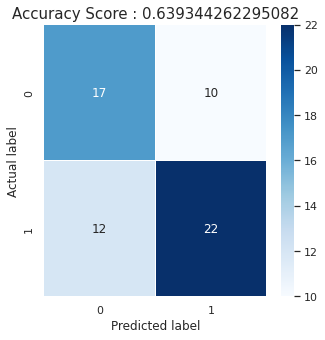

In [ ]:
cm = confusion_matrix(y_test,y_pred) # Creating the Confusion matrix for KNN
plt.figure(figsize = (5,5))#setting the size of figure 
sns.heatmap(data = cm, linewidth = .5, annot = True, cmap = 'Blues') #displaying the confusion matrix using heat map function 
plt.ylabel('Actual label') #Assigning the y axis label
plt.xlabel('Predicted label') #Assigning the x axis label
all_sample_title = 'Accuracy Score : {0}'.format(knn.score(x_test, y_test)) # calculating the accuracy Score for KNN
plt.title(all_sample_title, size = 15) # assiging the title to the heatmap 

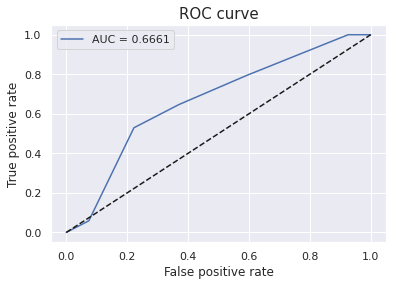

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score #importing roc_curve, roc_auc_score libraries to obtain the ruc curve and accuracy score
y_pred_proba = knn.predict_proba(x_test)[:][:,1]#calculating the probabilities or y_pred values 

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)#concatinating actual values and probabilities
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])#generating the ROC graphs along with false positive rate, true positive rate and threshold
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])#calculating the accuracy score using rocc_auc score

plt.plot(fpr,tpr,label = 'AUC = %0.4f' %auc)#ploting auc curve 
plt.plot(fpr,fpr, linestyle='--', color = 'k' )#ploting false positive rate  
plt.xlabel('False positive rate')#labeling the x axis 
plt.ylabel('True positive rate')#labeling the y axis 
plt.title('ROC curve', size=15)#giving title to graph
plt.legend()

As the auc score > 0.5 so we can conclude that the knn classifier gives good classified the classes and also if we compare it with other three classifiers it gives low results 

# **Conclusion **
In this mini project we have applied different classifiers like Decison Tree, SVM, KNN algorithm and logistic regression on heart attack dataset. By applying this classifiers we have obersverd that Logistic regression have the highest accuracy i.e. 85% and KNN algorthm having lowest acccuracy with 66%. So we can conclude that among these four algorithms logistic algorithm has given more precise output for the heart attack dataset.
